In [1]:
import pandas as pd
import numpy as np

In [2]:
benign=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.benign.csv")
g_c=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.gafgyt.combo.csv")
g_j=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.gafgyt.junk.csv")
g_s=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.gafgyt.scan.csv")
g_t=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.gafgyt.tcp.csv")
g_u=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.gafgyt.udp.csv")
m_a=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.mirai.ack.csv")
m_sc=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.mirai.scan.csv")
m_sy=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.mirai.syn.csv")
m_u=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.mirai.udp.csv")
m_u_p=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.mirai.udpplain.csv")

benign=benign.sample(frac=0.25,replace=False)
g_c=g_c.sample(frac=0.25,replace=False)
g_j=g_j.sample(frac=0.5,replace=False)
g_s=g_s.sample(frac=0.5,replace=False)
g_t=g_t.sample(frac=0.15,replace=False)
g_u=g_u.sample(frac=0.15,replace=False)
m_a=m_a.sample(frac=0.25,replace=False)
m_sc=m_sc.sample(frac=0.15,replace=False)
m_sy=m_sy.sample(frac=0.25,replace=False)
m_u=m_u.sample(frac=0.1,replace=False)
m_u_p=m_u_p.sample(frac=0.27,replace=False)

benign['type']='benign'
m_u['type']='mirai_udp'
g_c['type']='gafgyt_combo'
g_j['type']='gafgyt_junk'
g_s['type']='gafgyt_scan'
g_t['type']='gafgyt_tcp'
g_u['type']='gafgyt_udp'
m_a['type']='mirai_ack'
m_sc['type']='mirai_scan'
m_sy['type']='mirai_syn'
m_u_p['type']='mirai_udpplain'

data=pd.concat([benign,m_u,g_c,g_j,g_s,g_t,g_u,m_a,m_sc,m_sy,m_u_p],
               axis=0, sort=False, ignore_index=True)

In [3]:
from sklearn.model_selection import train_test_split

#Independent features
x= data.iloc[:,:-1]
y= data.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [7]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [13]:
model= XGBClassifier()

In [14]:
model.fit(x_train,y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [15]:
y_pred= model.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [17]:
score= accuracy_score(y_pred, y_test_encoded)

In [18]:
score

0.9947129017013232

In [19]:
classification_report(y_pred, y_test_encoded)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3028\n           1       1.00      1.00      1.00      3065\n           2       1.00      1.00      1.00      3039\n           3       1.00      1.00      1.00      3006\n           4       0.94      1.00      0.97      2910\n           5       1.00      0.95      0.97      3337\n           6       1.00      1.00      1.00      3008\n           7       1.00      1.00      1.00      2965\n           8       1.00      1.00      1.00      3338\n           9       1.00      1.00      1.00      3089\n          10       1.00      1.00      1.00      3071\n\n    accuracy                           0.99     33856\n   macro avg       0.99      1.00      0.99     33856\nweighted avg       1.00      0.99      0.99     33856\n'

In [20]:
confusion_matrix(y_pred, y_test_encoded)

array([[3027,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0],
       [   0, 3065,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    1, 3038,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    1,    0, 3005,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 2910,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  176, 3161,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 3008,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 2965,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 3338,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 3089,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3071]],
      dtype=int64)

In [24]:
y_pred_decoded = le.inverse_transform(y_pred)

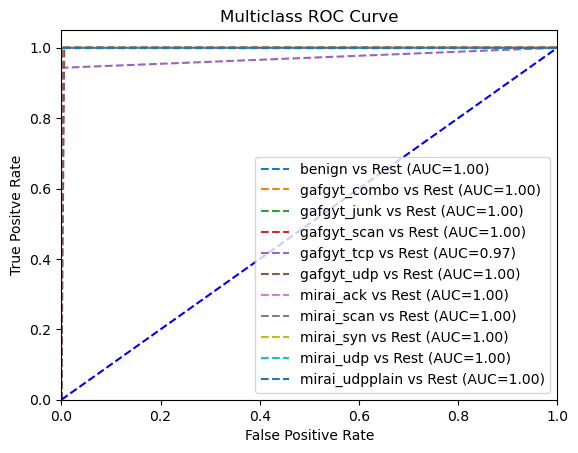

In [25]:
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt  

y_test_binarize= label_binarize(y_test, classes= np.unique(y_test))
y_pred_binarize= label_binarize(y_pred, classes= np.unique(y_pred))

#ROC Curve
fpr= {}
tpr= {}
thresh= {}
roc_auc= dict()

n_class= classes.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarize[:,i], y_pred_binarize[:,i])
    roc_auc[i]= auc(fpr[i], tpr[i])
    
    #plotting
    plt.plot(fpr[i], tpr[i], linestyle= '--', label= '%s vs Rest (AUC=%0.2f)'% (classes[i], roc_auc[i]))
    
plt.plot([0,1], [0,1], 'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.legend(loc= 'lower right')
plt.show()